# <font color='FF3300'>Calcul acoustique avec un modèle source-récepteur

On donne le script pour créer un projet simple, on crée un projet ne contenant qu'une source et un récépteur puis on calcule le résultat

La partie script de Code TYMPAN (l'API) se décompose très similairement à l'interface graphique (l'IHM), à savoir:  
* L'objet <font color='9900CC'>Projet</font> qui correspond à la partie projet de l'IHM avec un objet Site qui correspond au site de l'IHM.
* L'objet <font color='9900CC'>Model</font> contenant toutes les données nécéssaires aux calculs acoustiques.
* Le <font color='9900CC'>Solver</font> qui correspond à l'outil de calcul.
exemple

#### Dans ce tutoriel, on retrouve 4 étapes essentielles d'un script python d'API Tympan:
* Initialisations
* Création du projet
* Résolution du problème acoustique
* Récupération et affichage des résultats

### <font color='FF3300'>Initialisations<font>

On importe les différentes parties propres à TYMPAN le <font color='9900CC'>Projet</font>, le <font color='9900CC'>Site</font>, le <font color='9900CC'>Model</font> et le <font color='9900CC'>Solver</font> mais aussi les outils comme User_source, UserReceptor, Point3D

In [1]:
from tympan.models.project import Project 
from tympan.models.solver import Model, Solver, Spectrum
from tympan.models._business import User_source, UserReceptor, Site, Result
from tympan.models._common import Point3D

On importe les modules nécéssaires à la visualisation

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import pandas as pda
import numpy as np
from export_spectres_src import main as export_spectre

### <font color='FF3300'>Création du projet</font>

Dans ce script on crée et calcule le résultat d'un projet contenant uniquement une source et un récépteur. Pour ce faire, les commandes principales sont:
* ```python
Project.create() #Permet de creer un projet tympan```
* ```python
my_project.site #Correspond au site associé au projet ```
* ```python
Point3D(10,0,z_obligatoire) #Crée un Point3D, il est obligatoire de mettre 0 en coordonnée z sinon le calcul d'altimétrie ne fonctionne pas ```
* ```python
User_source(position1) #On crée la User_source(c'est à dire la source visible sur l'IHM)
my_site.add_user_source(source1,position1,3) # Ajoute la source au site, la dernière valeur correspond à la  hauteur au sol ```
* ```python
UserReceptor() #On crée le User_receptor (c'est à dire le recepteur visible sur l'IHM)
my_project.add_user_receptor(Point3D(10,10,z_obligatoire),2,"recepteur1") #On ajoute le  recepteur au projet à la position choisie, on donne un nom au recepteur ```

On ajoute les sources au site et les récépteurs au projet, cela vient de l'IHM de Code TYMPAN 


In [3]:
my_project = Project.create()
my_site = my_project.site

In [4]:
z_obligatoire = 0
position1 = Point3D(10, 0, z_obligatoire)
source1 = User_source()
source1.set_hauteur(3)
source1.set_name('source1')
source1.set_position(position1)
my_site.add_user_source(source1, position1, 3)

In [5]:
recepteur1 = UserReceptor()
my_project.add_user_receptor(Point3D(10,10,z_obligatoire),2,"recepteur1")

#### Import du projet

De manière alternative, on peut créer un projet sur la base d'un projet déjà existant, en important simplement le contenu d'un fichier .xml. Pour cela, les commandes à utiliser sont:
* ```python
Project.from_xml(r'Projet_base.xml') #On récupère le projet Projet_base.xml ```
* ```python
Model.from_project(my_project) #On récupère le model de calcul, ie les éléments à prendre en compte dans le calcul ```

On ajoute a chaque source un spectre
* ```np.array([90]*31,dtype = float) #On crée un numpy array contenant 31 fois la valeur 90.0 le type attendu des objet est float ```
* ```Spectrum(np.array([90]*31,dtype = float)) #On crée le spectre avec 90dB sur les 31 tiers d'octave ```
* ```source.set_spectrum(Spectrum(np.array([90]*31),dtype=float)) #On ajoute le spectre a la source ```

In [6]:
for source in my_project.site.user_sources:
    source.set_spectrum(Spectrum(np.array([90]*31,dtype=float)))

### <font color='FF3300'>Résolution du problème acoustique <font>

Une fois  constitués le Projet et le Modèle, le calcul acoustique se réalise à l'aide des commandes suivantes: 

In [7]:
# La mise à jour de l'altimétrie est nécessaire lorsque le projet est créé avec Project.create()
# Dans l'alternative de l'import à partir d'un xml, la mise à jour de l'altimétrie est automatiquement réalisée
my_project.update_site_altimetry(verbose=True)

C:\Code_TYMPAN\cython\tympan\altimetry\builder.py:98: RuntimeWarning: main site landtake (or surrounding level curve) does not appear to be closed; closing it for altimetry processing
  RuntimeWarning)


In [8]:
# my_project = Project.from_xml(r'Projet_base.xml', verbose=True)
my_model = Model.from_project(my_project)

* ```python
Solver.from_project(my_project) #On récupère le solver du projet par défaut c'est le default_solver ```
* ```python
my_solver.solve(my_model) #On résout le calcul et on récupère le résultat ```
* ```python
my_project.import_result(my_model,my_result) #On ajoute dans le projet le résultat calculé au modèle```
* ```python
my_result.spectrum(0,0) #donne le spectre de la source 0 sur le recepteur 0 ```
* ```python
my_project.to_xml(r'Projet_base.xml') #On sauvegarde le projet dans Projet_base.xml ```

In [9]:
my_solver = Solver.from_project(my_project,verbose=True)

In [10]:
my_result = my_solver.solve(my_model)

In [11]:
my_project.import_result(my_model,my_result)

In [12]:
my_project.to_xml(r'Projet_base.xml')

### <font color='FF3300'>Récuperation des résultats et affichage<font>

Contrairement à l'IHM qui propose des affichages préétablis, l'affichage des résultats depuis l'API est à construire selon chaque besoin. On se retrouve ainsi dans environnement typique de Python où, dans notre cas, la librairie matplotlib est choisie pour visualiser des résultats. Quelques commandes basiques dont données à titre d'exemple:

* ```python
plt.figure() #Créer une nouvelle fenetre d'affichage
plt.title("Comparaison des intensité dB et dBA)
plt.xlabel("fréquence")
plt.ylabel("intensité") #On nomme et légende le schéma
plt.plot(fréquences,spectre_dBA, 'bo' )#On construit graphique```
* ```python
plt.show() #On affiche```
<font color='red'>Pour aller plus loin</font> le lecteur intéressé pourra conculter ce site [tutoriel de matplotlib](https://matplotlib.org/users/index.html)

In [13]:
#On va maintenant tracer la différence entre le spectre en dB et le spectre en dBA
spectre = my_result.spectrum(0,0)
spectre_dB = spectre.to_dB().values
ponderation = [-56.7,-50.5,-44.7,-39.4,-34.6,-30.2,-26.2,-22.5,-19.1,-16.1,-13.4,-10.9,-8.6,-6.6,-4.8,-3.2,-1.9,-0.8,0,0.6,1,1.2,1.3,1.2,1,0.5,-0.1,-1.1,-2.5,-4.3,-6.6]
spectre_dBA = [spec_dB + pond for spec_dB, pond in zip(spectre_dB,ponderation)]
fréquences = range(31)

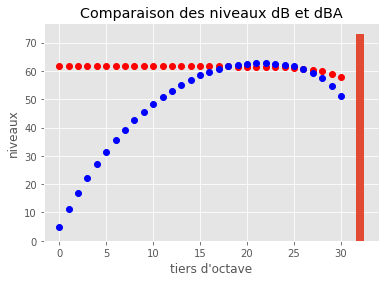

In [14]:
#plt.figure()
plt.xlabel("tiers d'octave")
#changer echelle
plt.ylabel("niveaux")
plt.title("Comparaison des niveaux dB et dBA")
plt.plot(fréquences,spectre_dB,'ro')
plt.plot(fréquences,spectre_dBA, 'bo')
plt.bar([32],[spectre.dBA])
plt.show()

### <font color='FF3300'>Astuces pour aller plus loin <font>

On peut écrire une fonction permettant d'afficher une fenêtre similaire à celle de Code Tympan qui, pour chaque couple
source récépteur, donne la valeur globale du spectre. Cette fonction est réutilisable pour tout projet tympan.
* ```python
my_result.nsources #donne le nombre de sources prisent en compte pour le calcul ```
* ```python
my_result.nreceptors #donne le nombre de récépteurs pris en compte pour le calcul```
* ```python 
my_result.spectrum(id_rec,id_src).dBA #Donne le niveau global de la source id_src sur le recepteur id_rec ```
* ```python
pda.DataFrame(a_afficher, index = ["source " + str(i) for i in range(my_result.nsources)], columns = ["recepteur " + str(i) for i in range(my_result.nreceptors)]) #On affiche le tableau ```
[tutoriel pandas](http://www.python-simple.com/python-pandas/creation-dataframes.php)

In [15]:
# definition de la fonction
def val_global(my_project):
    my_model = Model.from_project(my_project)
    my_solver = Solver.from_project(my_project,verbose=True)
    my_result = my_solver.solve(my_model)
    a_afficher = []
    # on boucle sour les differentes sources 
    for id_src in range(my_result.nsources):
        l_src = []
        ## on recupère la contribution de la source en cours sur chaque recepteur
        for id_rec in range(my_result.nreceptors):
                l_src.append(my_result.spectrum(id_rec,id_src).dBA)
        a_afficher.append(l_src)
    affichage = pda.DataFrame(a_afficher, index = ["source " + str(i) for i in range(my_result.nsources)], columns = ["recepteur " + str(i) for i in range(my_result.nreceptors)]) 
    return affichage

Une fois la fonction définie, on l'appelle à volonté:

In [16]:
val_global(my_project)

recepteur 0
source 0    73.121715

Il est aussi possible d'utiliser la fonction ```export_spectre_src``` renvoyant un fichier txt avec le spectre de chaque recepteur sur chaque source qui est directement lisible avec pandas.


In [17]:
# FIXME export_sepctre_src plante en python et en jupyter
export_spectre(r'Projet_base.xml',r'Mon_spectre_parSurface.txt')
pda.read_csv(r'Mon_spectre_parSurface.txt')
#ou 
pda.read_csv(r'Mon_spectre_parVolume.txt')

UnsupportedOperation: fileno